# CSCI E-89 Deep Learning
## LAB 03: Keras3 Functional API - CIFAR-10 Dataset

### Introduction

Create and train a complex model using Keras Functional API. The example will focus on a multi-layered neural network for a classification task using the popular CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes. After training, we will evaluate the results and plot the training and validation loss/accuracy.

A convolutional neural network (CNN) is constructed using the Keras Functional API. This allows for building models with non-linear topologies and shared layers, providing more flexibility than the Sequential API.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.3079 - loss: 1.8370 - val_accuracy: 0.4486 - val_loss: 1.4597
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.5191 - loss: 1.3273 - val_accuracy: 0.6164 - val_loss: 1.0569
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.6157 - loss: 1.0992 - val_accuracy: 0.6722 - val_loss: 0.9358
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.6665 - loss: 0.9643 - val_accuracy: 0.6990 - val_loss: 0.8735
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7060 - loss: 0.8564 - val_accuracy: 0.7193 - val_loss: 0.7955
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.7358 - loss: 0.7695 - val_accuracy: 0.7282 - val_loss: 0.7845
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 

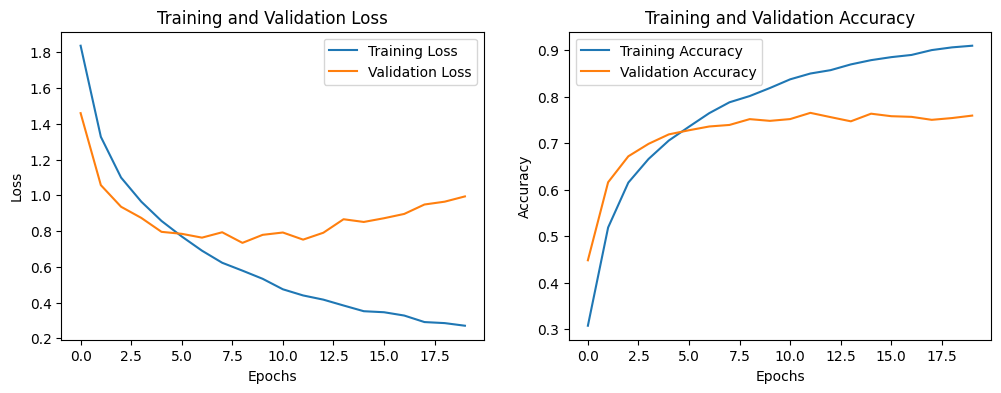

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Build the complex model using the Functional API
inputs = layers.Input(shape=(32, 32, 3))

# First block: Convolutional + MaxPooling
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Second block: Convolutional + MaxPooling
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Third block: Convolutional + MaxPooling
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the output and pass it through fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Output layer for classification (softmax for 10 classes)
outputs = layers.Dense(10, activation='softmax')(x)

# Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,  # Use 20% of training data for validation
                    verbose=1)

# Step 4: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Step 5: Plot training and validation loss/accuracy
def plot_history(history):
    # Plot loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

plot_history(history)
